<a href="https://colab.research.google.com/github/alfonsoayalapaloma/ml-2024/blob/main/ml_06_supervised_neuralnetworks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://pandas.pydata.org/static/img/pandas.svg" width="250">


## <center> Neural Networks

# Solución de un problema de Reconocimiento de imagenes en Machine Learning



1.   Análisis del problema. Eleccion de un modelo.
2.   Extracción del dataset. Limpieza
1.   EDA. Analisis de la dataset
1.   Feature engineering [ determinar las features]
2.   Definir los hiperparametros del modelo
2.   Crear el modelo y Entrenarlo
1.   Hacer predicciones
1.   Calificar el modelo
2.   Visualizar el resultado del modelo
1.   Conclusiones


# Problema de clustering de data de pinguinos

1. Análisis del problema


Usted es un ingeniero de Machine Learning trabajando para una empresa digitalizadora y se le encarga crear un modelo capaz de reconocer los numeros manuscritos en documentos contables. Para ello cuenta con un dataset que contiene ejemplos de numeros manuscritos y sus labels (rotulos) que indican que numero es.


Esto es aprendizaje supervisado porque se tienen los rotulos. Se puede utilizar una red neuronal.

2. Extraccion del dataset. Limpieza

In [34]:
from tensorflow.keras.datasets import mnist
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# the data, split between train and validation sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [35]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [36]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 170,
        253, 253, 253, 253, 253, 225, 172, 253, 242, 195,  64,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  49, 238, 253, 253, 253, 253,
        253, 253, 253, 253, 251,  93,  82,  82,  56,  39,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  18, 219, 253, 253, 253, 253,
        253, 198, 182, 247, 241,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  80, 156, 107, 253, 253,
        205,  11,   0,  43, 154,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  14,   1, 154, 253,
         90,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 139, 253,
        190,   2,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  11, 190,
        253,  70,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  35,
        241, 225, 160, 108,   1,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         81, 240, 253, 253, 119,  25,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  45, 186, 253, 253, 150,  27,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  16,  93, 252, 253, 187,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 249, 253, 249,  64,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  46, 130, 183, 253, 253, 207,   2,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  39,
        148, 229, 253, 253, 253, 250, 182,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  24, 114, 221,
        253, 253, 253, 253, 201,  78,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  23,  66, 213, 253, 253,
        253, 253, 198,  81,   2,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  18, 171, 219, 253, 253, 253, 253,
        195,  80,   9,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  55, 172, 226, 253, 253, 253, 253, 244, 133,
         11,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0, 136, 253, 25

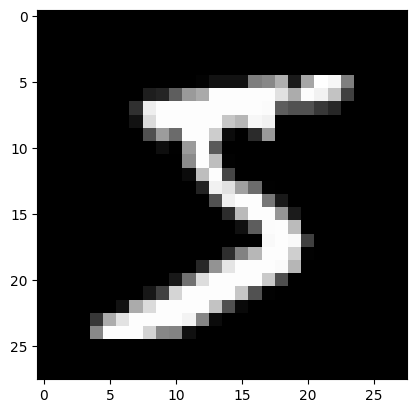

In [37]:
import matplotlib.pyplot as plt

image = X_train[0]
plt.imshow(image, cmap='gray')

In [38]:
print(y_train[0])

5


In [59]:
class_indices = np.unique(y_train).tolist()
class_indices

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [58]:
class_names = [str(class_index) for class_index in class_indices]
class_names

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

In [53]:
class_indices = {class_name: i for i, class_name in enumerate(class_names)}

Aplanar las imágenes

In [39]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [40]:
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)

In [41]:
print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


Normalizar las imágenes

In [42]:
X_train.max()

255

In [43]:
X_train = X_train / 255
X_test = X_test / 255

In [44]:
X_train.max()

1.0

3. EDA. Análisis del dataset

In [45]:
def attributes(arr):
  # Attributes
  print("\nAttributes:")
  print(f"Shape: {arr.shape}")          # (2, 3)
  print(f"Dimensions: {arr.ndim}")      # 2
  print(f"Total Elements: {arr.size}") # 6
  print(f"Data Type: {arr.dtype}")      # int64 (platform-dependent)
  print(f"Item Size: {arr.itemsize} bytes") # Size of each element
attributes(X_train)


Attributes:
Shape: (60000, 784)
Dimensions: 2
Total Elements: 47040000
Data Type: float64
Item Size: 8 bytes


4. Feature engineering

In [46]:
print(y_train.shape)
print(y_test.shape)

(60000,)
(10000,)


In [47]:
#Convert labels to categories
import tensorflow.keras as keras
num_categories = 10

y_train_nn = keras.utils.to_categorical(y_train, num_categories)
y_test_nn = keras.utils.to_categorical(y_test, num_categories)


In [48]:
print(y_train_nn.shape)
print(y_test_nn.shape)

(60000, 10)
(10000, 10)


5. Definir hiperparametros del modelo.

En este caso el numero de categorias de salida es 10.
El numero de units (neuronas) se puede iniciar en 512.
La funcion de activacion puede ser relu
La funcion de perdida puede ser categorical_crossentropy


6. Crear y Entrenar (Ajustar) el modelo.

In [49]:
from tensorflow.keras.models import Sequential

model = Sequential()

from tensorflow.keras.layers import Dense

model.add(Dense(units=512, activation='relu', input_shape=(784,)))
model.add(Dense(units = 512, activation='relu'))
model.add(Dense(units = 10, activation='softmax'))
model.summary()


model.compile(loss='categorical_crossentropy', metrics=['accuracy'])




history = model.fit(
    X_train, y_train_nn, epochs=5, verbose=1, validation_data=(X_test, y_test_nn)
)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 669,706 (2.55 MB)

 Trainable params: 669,706 (2.55 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 25s 12ms/step - accuracy: 0.9039 - loss: 0.3137 - val_accuracy: 0.9690 - val_loss: 0.1075
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 12ms/step - accuracy: 0.9757 - loss: 0.0810 - val_accuracy: 0.9727 - val_loss: 0.1027
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 42s 13ms/step - accuracy: 0.9836 - loss: 0.0585 - val_accuracy: 0.9779 - val_loss: 0.0802
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 42s 13ms/step - accuracy: 0.9879 - loss: 0.0431 - val_accuracy: 0.9806 - val_loss: 0.0883
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 13ms/step - accuracy: 0.9904 - loss: 0.0346 - val_accuracy: 0.9800 - val_loss: 0.0945


7. Hacer predicciones

In [50]:
# Predict classes for the test set
y_pred_nn = model.predict(X_test)
y_pred_classes_nn = np.argmax(y_pred_nn, axis=1)
y_true_nn = np.argmax(y_test_nn, axis=1)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


8. Calificar el modelo

In [52]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test_nn, verbose=1)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9756 - loss: 0.1140
Test Loss: 0.09445769339799881
Test Accuracy: 0.9800000190734863


In [62]:
# Classification Report
print("Classification Report:")

report = classification_report(y_true_nn, y_pred_classes_nn, target_names=class_names, labels=class_indices )
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.99      0.95      0.97      1032
           3       0.99      0.98      0.98      1010
           4       0.97      0.98      0.97       982
           5       0.98      0.98      0.98       892
           6       0.99      0.97      0.98       958
           7       0.97      0.98      0.98      1028
           8       0.97      0.98      0.97       974
           9       0.97      0.99      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



9. Visualizar el resultado

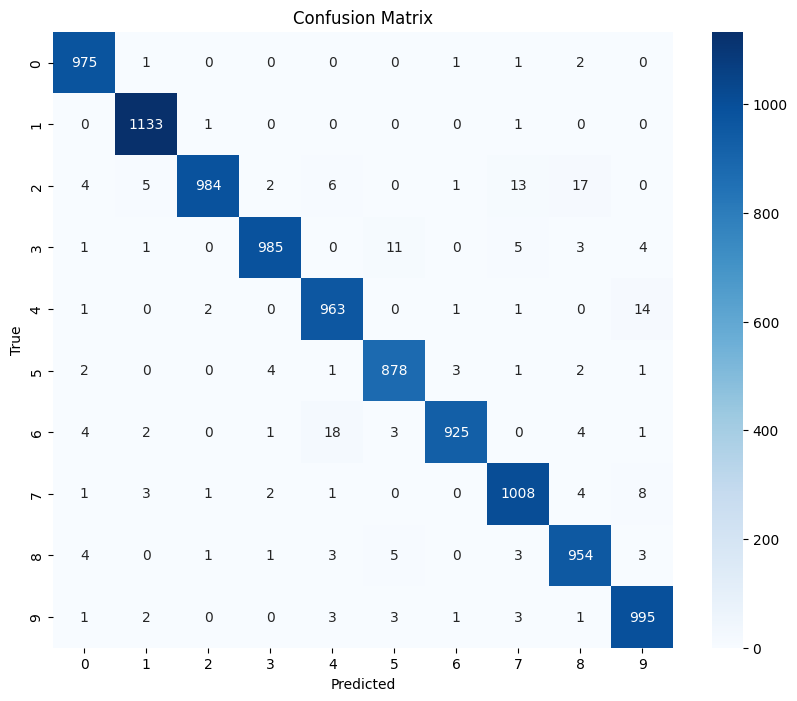

In [63]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_true_nn, y_pred_classes_nn)

# Plotting the Confusion Matrix
plt.figure(figsize=(10,8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()



10. Elaborar conclusiones

El modelo es capaz de reconocer los numeros apropiadamente.

# EJERCICIO
Utilice otro clasificador para el problema de reconocimiento de numeros manuscritos.




1. Análisis del problema. Elección de un modelo.

2. Extracción del dataset. Limpieza.

3. EDA Análisis del dataset

4. Feature engineering

5. definir los hiperparametros del modelo

6. Crear el modelo y entrenarlo.

7. Hacer predicciones

8. Calificar el modelo

9. Visualizar el resultado del modelo

10. Conclusiones

# EJERCICIO

Realice el mismo ejercicio con el dataset de IRIS



In [65]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the Boston Housing dataset
from sklearn.datasets import fetch_california_housing
boston = fetch_california_housing()
X = boston.data  # Features: Various factors influencing house prices
y = boston.target  # Target: Housing prices

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the neural network model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),  # Input layer
    Dense(32, activation='relu'),                                  # Hidden layer
    Dense(1)                                                        # Output layer (single output for regression)
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='mean_squared_error',  # MSE is used for regression
    metrics=['mean_absolute_error']
)

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=16, validation_split=0.2, verbose=1)

# Evaluate the model on test data
loss, mae = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Mean Absolute Error: {mae:.2f}")

# Make predictions
predictions = model.predict(X_test)
print("Predicted House Prices:", predictions[:5])  # Display first 5 predictions


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
826/826 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 1.7109 - mean_absolute_error: 0.8648 - val_loss: 0.4266 - val_mean_absolute_error: 0.4705
Epoch 2/100
826/826 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.3888 - mean_absolute_error: 0.4484 - val_loss: 0.3994 - val_mean_absolute_error: 0.4364
Epoch 3/100
826/826 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.3725 - mean_absolute_error: 0.4303 - val_loss: 0.3994 - val_mean_absolute_error: 0.4424
Epoch 4/100
826/826 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.3843 - mean_absolute_error: 0.4204 - val_loss: 0.3742 - val_mean_absolute_error: 0.4160
Epoch 5/100
826/826 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.3308 - mean_absolute_error: 0.4040 - val_loss: 0.3676 - val_mean_absolute_error: 0.4059
Epoch 6/100
826/826 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.3213 - mean_absolute_error: 0.3978 - val_loss: 0.3481 - val_mean_absolute_error: 0.4109
Epoch 7/100
826/826 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.3243 - mean_absolute_error: 0.3